### Question 1. How can I move to the directory I want using the library os & Linux Command?


*   I'd like to move to the directory name '/content/sample_data'.

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/sample_data')

In [ ]:
os.mkdir('temp')

In [ ]:
os.listdir(os.getcwd())

['anscombe.json',
 'README.md',
 'temp',
 'california_housing_train.csv',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv']

In [ ]:
len(os.listdir(os.getcwd()))

7

In [ ]:
# (2) cd


In [ ]:
!pwd

/content/sample_data


In [ ]:
!ls -l

total 55508
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Dec 19 14:20 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Dec 19 14:20 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Dec 19 14:20 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Dec 19 14:20 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md
drwxr-xr-x 2 root root     4096 Dec 28 03:58 temp


In [ ]:
%cd /content/sample_data

/content


### Question 2. Please write a code that copies new.txt with a file name new3.txt.
*   Directory: /content/drive/MyDrive/intro-dl/afhq/new_folder



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

In [ ]:
os.chdir('/content/drive/MyDrive/intro-dl/afhq')

In [ ]:
!ls -l

total 12
drwx------ 3 root root 4096 Dec 28 04:14 new_folder
drwx------ 2 root root 4096 Dec 27 05:18 train
drwx------ 2 root root 4096 Dec 27 05:21 val


In [ ]:
f = open("new.txt", 'w')
f.close()

In [ ]:
!ls -l

total 12
drwx------ 3 root root 4096 Dec 28 04:14 new_folder
-rw------- 1 root root    0 Dec 28 04:15 new.txt
drwx------ 2 root root 4096 Dec 27 05:18 train
drwx------ 2 root root 4096 Dec 27 05:21 val


In [ ]:
!mkdir new_folder

mkdir: cannot create directory ‘new_folder’: File exists


In [ ]:
!ls -l

total 12
drwx------ 3 root root 4096 Dec 28 04:14 new_folder
-rw------- 1 root root    0 Dec 28 04:15 new.txt
drwx------ 2 root root 4096 Dec 27 05:18 train
drwx------ 2 root root 4096 Dec 27 05:21 val


In [ ]:
src = '/content/drive/MyDrive/intro-dl/afhq/new.txt'
dst = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new.txt'

In [ ]:
shutil.move(src, dst)

'/content/drive/MyDrive/intro-dl/afhq/new_folder/new.txt'

In [ ]:
%cd /content/drive/MyDrive/intro-dl/afhq/new_folder

/content/drive/MyDrive/intro-dl/afhq/new_folder


In [ ]:
!ls -l

total 0
-rw------- 1 root root 0 Dec 28 04:05 new.txt


In [ ]:
src2 = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new.txt'
dst2 = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new3.txt'

In [ ]:
shutil.move(src2, dst2)

'/content/drive/MyDrive/intro-dl/afhq/new_folder/new3.txt'

In [ ]:
!ls -l

total 0
-rw------- 1 root root 0 Dec 28 04:05 new3.txt


In [ ]:
## numpy, pandas -- later

## Basic Pytorch

*     Reference. https://github.com/Justin-A/DeepLearning101/blob/master/1-2_Basic_Autograd.ipynb

In [ ]:
import torch

In [ ]:
## Simple Question.
## What is (Py)torch?
## Google it and write the answer.

## (Py)torch is open source machine learning library made by  Facebook's AI Research lab.
## Pytorch is implemented in Python.
## PyTorch is primarily used as a platform for building and learning deep learning models.

### Question 3. Compute L1/L2 Norm between matrix1 and matrix2 above.
*     Hint: https://pytorch.org/docs/stable/generated/torch.linalg.norm.html

In [ ]:
import torch

In [ ]:
matrix1 = torch.tensor([[1., 2.], [3., 4.]])
print (matrix1)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
matrix2 = torch.tensor([[5., 6.], [7., 8.]])
print (matrix2)

tensor([[5., 6.],
        [7., 8.]])


In [ ]:
l1_norm = torch.linalg.norm(matrix1 - matrix2, ord=1)
print (l1_norm)

tensor(8.)


In [ ]:
l2_norm = torch.linalg.norm(matrix1 - matrix2, ord=2)
print (l2_norm)

tensor(8.0000)


In [ ]:
## Hard Mode (Optional)
## Compute Cosine Similarity between matrix1 and matrix2 above.

## Your Answer



### Question 4. Please write a line-by-line explanation of the code above. (Simple MLP only)




## Simple MLP

*    Reference. https://github.com/Justin-A/DeepLearning101/blob/master/2-1_MNIST_MLP.ipynb

In [ ]:
''' 1. Module Import '''
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)
# 딥러닝 학습을 진행할 때 필요한 디바이스 설정한다.
# GPU 사용 가능한 경우에는 GPU 사용하고 불가능할 경우에는 CPU 사용한다.

Using PyTorch version: 2.1.0+cu121  Device: cpu


In [ ]:
BATCH_SIZE = 32
EPOCHS = 10
#학습할 때 사용할 하이퍼파라미터의 배치 사이즈와 에포크를 설정한다.
# number of epochs -> number of training sessions (학습 횟수)

In [ ]:
''' 3. MNIST Download (Train set, Test set split) '''
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())
# MNIST 데이터셋을 다운로드 한 뒤 학습 데이터와 테스트 데이터로 나눈다.
# train = True -> training에 사용되는 데이터
# 데이터셋의 이미지를 Pytorch tensors로 변환한다.

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())
# train = False -> training에 사용되지 않는 데이터


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
# 학습을 진행할 미니 배치의 사이즈를 결정한다.
# 학습 데이터의 경우 셔플을 진행한다.
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)
# 테스트를 진행할 미니 배치의 사이즈를 결정한다.
# 테스트 데이터의 경우 셔플을 진행하지 않는다.

100%|██████████| 9912422/9912422 [00:00<00:00, 95413377.25it/s]


Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 92540636.99it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 28434130.52it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5446120.29it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [ ]:
## Quick Question
# What is MNIST?
# Google it and write the answer
# MNIST stands for 'Modified National Institute of Standards and Technology database'.
# It is a large database of handwritten digits.

In [ ]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break
# 첫번째 미니배치에서의 input data와 각각의 label에 대한 크기와 유형을 출력한다.

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


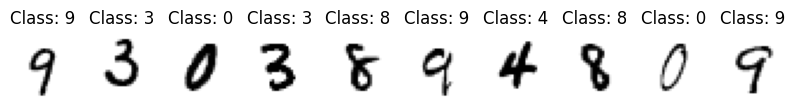

In [ ]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
# 표시할 이미지의 크기를 설정한다.
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))
# 미니 배치에서 처음 10개의 이미지 데이터를 표현한다.
# 이미지를 표시할 때 불필요한 축은 off한다.
# i번째 데이터를 선택하여 Numpy 배열로 변환한 뒤 크기를 28x28로 재구성하여 흑백 이미지로 나타낸다.
# 각 이미지의 label을 제목으로 추가한다.

In [ ]:
''' Multi Layer Perceptron '''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
# 첫번째 fully connected layer : size 28x28(=784) -> size 512
# 두번째 fully connected layer : size 512 -> size 256
# 세번째 fully connected layer : size 256 -> size 10

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x
# forward pass 방법을 이용한다.
# 주어진 데이터를 1D로 펼친다.
# 첫번째 fully connected layer로 input 데이터를 적용한다.
# Sigmoid activation function을 적용한다.
# 두번째 fully connected layer를 적용한다.
# Sigmoid activation function을 적용한다.
# 세번째 fully connected layer를 적용한다.
# Log Softmax activation function을 적용한다.

In [ ]:
''' Optimizer, Objective Function '''
model = Net().to(DEVICE)
# Net 클래스로부터 모델 생성 후 디바이스로 이동한다.
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
# Stochastic Gradient Descent optimizer를 설정한다.
# learning rate = 0.01, momentum = 0.5
criterion = nn.CrossEntropyLoss()
# Cross-Entropy Loss 함수를 생성한다.

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
# 모델을 학습모드로 설정한다.
    for batch_idx, (image, label) in enumerate(train_loader):
# train loader를 이용하여 학습 데이터 배치 interate한다.
        image = image.to(DEVICE)
        label = label.to(DEVICE)
# 이미지 데이터와 label을 디바이스로 보낸다.
        optimizer.zero_grad()
# gradient를 초기화한다.
        output = model(image)
# 이미지 데이터에 대한 output을 출력한다.
        loss = criterion(output, label)
# 출력된 output과 label 강의 Cross-Entropy loss를 계산한다.
        loss.backward()
# backpropagation을 통해 gradient를 계산한다.
        optimizer.step()
# optimizer를 이용하여 parameter를 업데이트 한다.

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))
# 주어진 log interval을 기준으로 학습 진행 상황을 출력한다.

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
# 모델을 테스트 모드로 설정한다.
# test loss와 정확도를 초기화한다.

    with torch.no_grad():
# gradient를 계산하지 않도록 설정한다.
        for image, label in test_loader:
# test loader를 이용하여 테스트 데이터 배치 interate한다.
            image = image.to(DEVICE)
            label = label.to(DEVICE)
# 이미지 데이터와 label을 디바이스로 보낸다.
            output = model(image)
# 이미지 데이터에 대한 output을 출력한다.
            test_loss += criterion(output, label).item()
# 출력된 output과 label 강의 Cross-Entropy loss를 계산하고 누적한다.
            prediction = output.max(1, keepdim = True)[1]
# output 중 가장 큰 값과 해당하는 index를 출력한다.(예측값 추출)
            correct += prediction.eq(label.view_as(prediction)).sum().item()
# 추출한 예측값과 실제 label을 비교한 뒤 일치할 경우 1, 불일치할 경우 0을 추출하여 이를 누적한다.

    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
# 테스트의 loss를 전체 데이터셋의 크기로 나눠 정규화한다.(평균 손실)
    test_accuracy = 100. * correct / len(test_loader.dataset)
# 테스트의 정확도를 전체 데이터셋의 크기로 나누고 100을 곱하여 백분율로 바꾼다.
    return test_loss, test_accuracy


In [ ]:
for epoch in range(1, EPOCHS + 1):
# 주어진 epochs의 수만큼 iterate (epochs 수 = 10)
    train(model, train_loader, optimizer, log_interval = 200)
# 각 epoch에 대한 학습을 진행한다.
    test_loss, test_accuracy = evaluate(model, test_loader)
# 각 epoch에 대한 테스트를 진행한다. (test loss와 정확도 계산)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))
# test loss와 정확도를 출력한다.
# test loss는 소수점 아래 넷째자리까지, 정확도는 소수점 아래 둘째자리까지 표시한다.

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.366546
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.289021
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.297900
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.312743
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.332374
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.286131
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.296104
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.274009
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.277810
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.295577

[EPOCH: 1], 	Test Loss: 2.2357, 	Test Accuracy: 14.47 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.222473
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.149013
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.089816
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.095840
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 2.056509
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.812690
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.760091
T

### Question 5 (Optional). Please read and summarize the following 3 documents:

*    https://wikidocs.net/57168
*    https://wikidocs.net/52460
*    https://wikidocs.net/52846